# Data Analysis

In [46]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
# Importing the dataset
df = pd.read_csv('data/output/data_complete_2022-06-22.csv')

In [59]:
df.describe()

,Outside Temperature,Avg. Temperature,RH,va,Tg,Gender,Age,Height,Weight,Duration,Icl,Thermal feeling (global),comfort_group
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,12.676277,18.473325,61.421259,0.111405,18.189416,0.470803,37.656934,172.974453,71.813869,13.202555,0.961168,0.014599,0.051095
std,4.637698,3.892243,12.614087,0.100530,4.117826,0.500060,17.422539,10.565827,15.788843,10.458099,0.270991,1.185909,0.763846
min,5.200000,10.640000,31.980000,0.000000,9.810000,0.000000,11.000000,146.000000,35.000000,2.500000,0.311300,-3.000000,-1.000000
25%,7.825000,15.287750,54.462500,0.040000,14.282500,0.000000,25.000000,165.000000,60.000000,7.500000,0.753850,-1.000000,-1.000000
50%,13.550000,19.197500,61.260000,0.080000,18.887500,0.000000,34.000000,172.000000,69.500000,7.500000,0.970950,0.000000,0.000000
75%,17.407500,21.582500,72.450000,0.160000,21.276250,1.000000,47.000000,181.000000,82.000000,22.500000,1.163000,1.000000,1.000000
max,19.200000,24.925000,86.160000,0.705000,25.310000,1.000000,87.000000,200.000000,130.000000,60.000000,1.847700,2.000000,1.000000


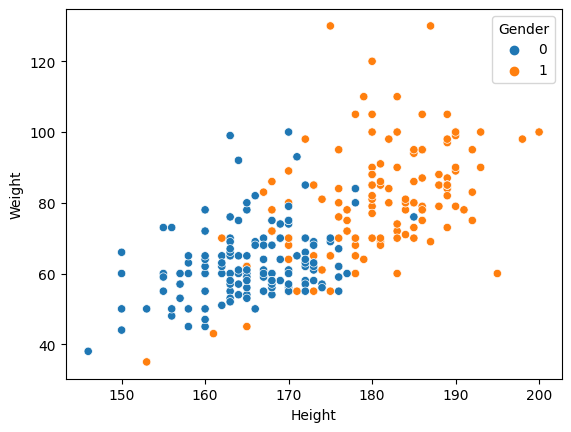

In [50]:
sns.scatterplot(data=df, hue='Gender', x='Height', y='Weight')
plt.show()

In [56]:
def function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

df['comfort_group'] = df['Thermal feeling (global)'].apply(function)

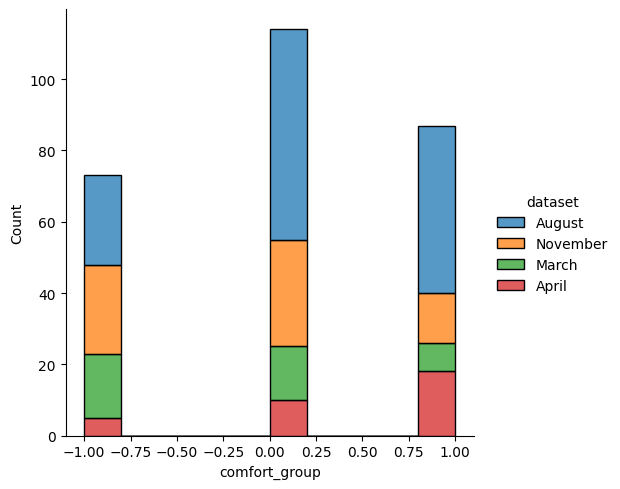

In [57]:
sns.displot(data=df, x="comfort_group", hue="dataset", multiple="stack")
plt.show()

# Analysis of function models
Can a linear model really be trusted when so many data points have the same y value? (0)
and is it ok to reduce the spectrum form (-3,3) to (-1,1)?

## Short visualization using only one feature

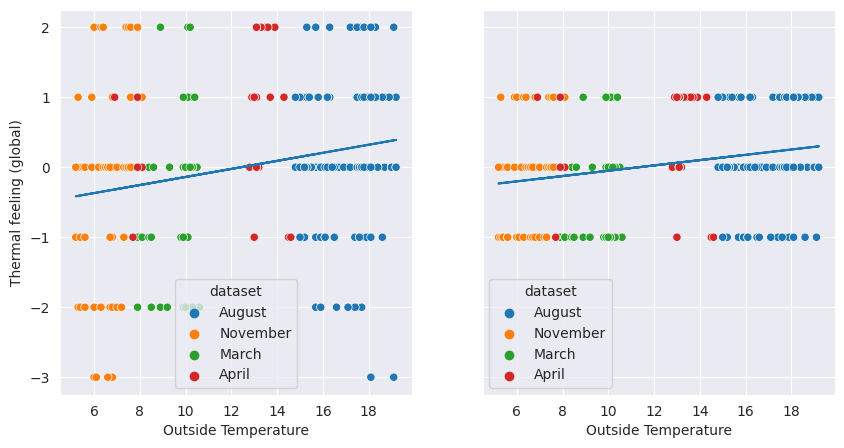

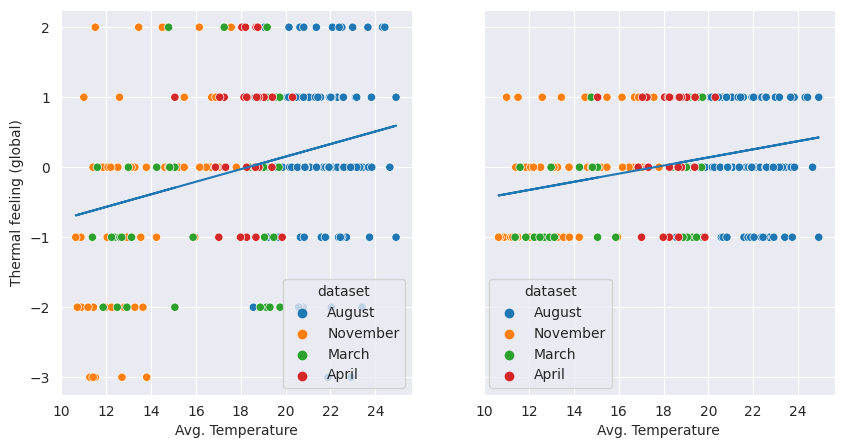

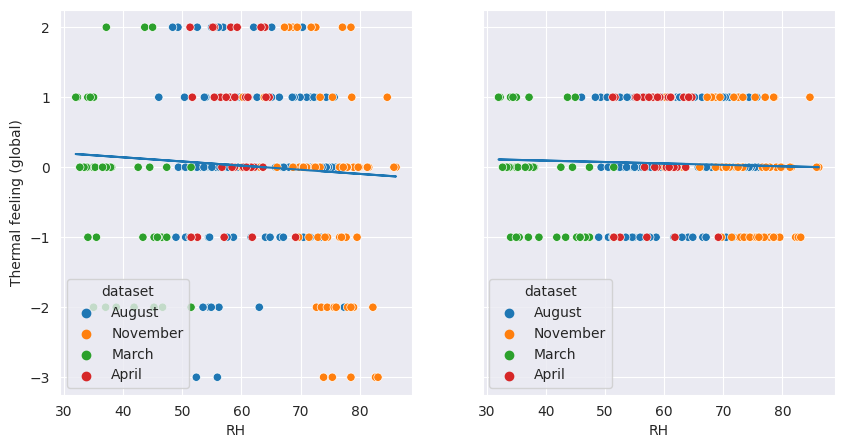

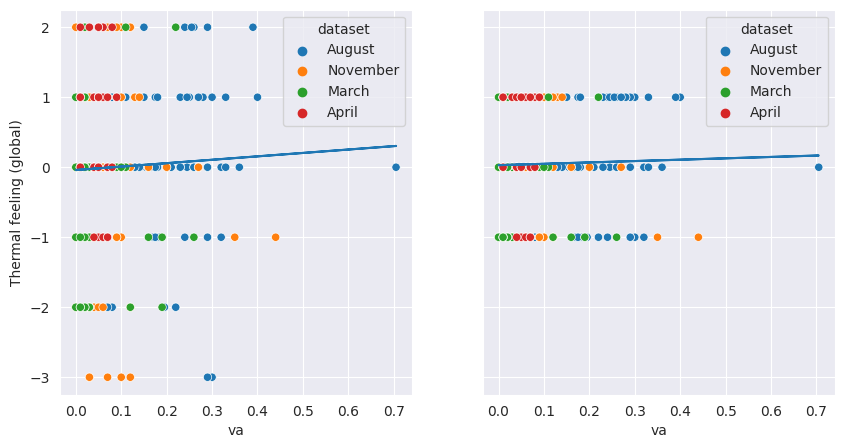

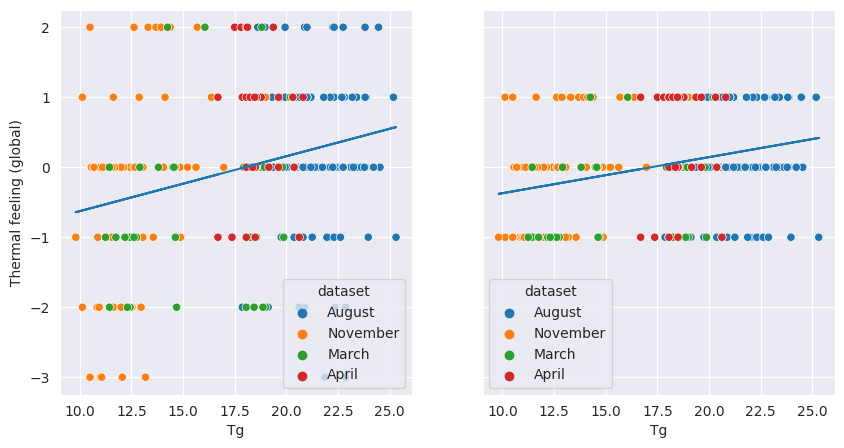

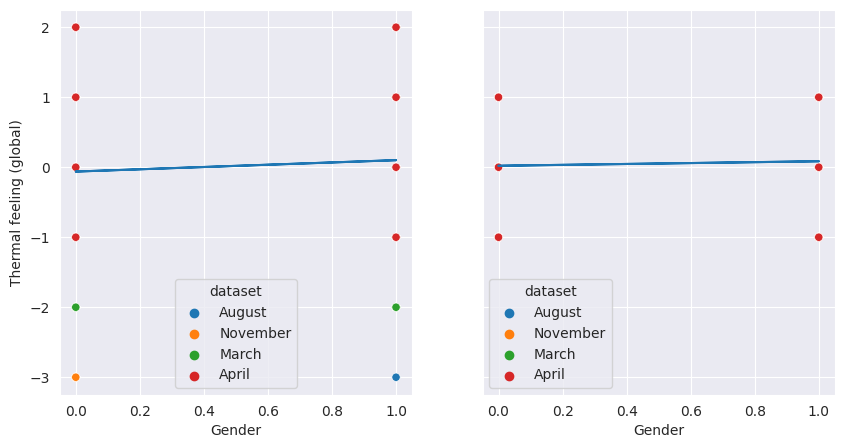

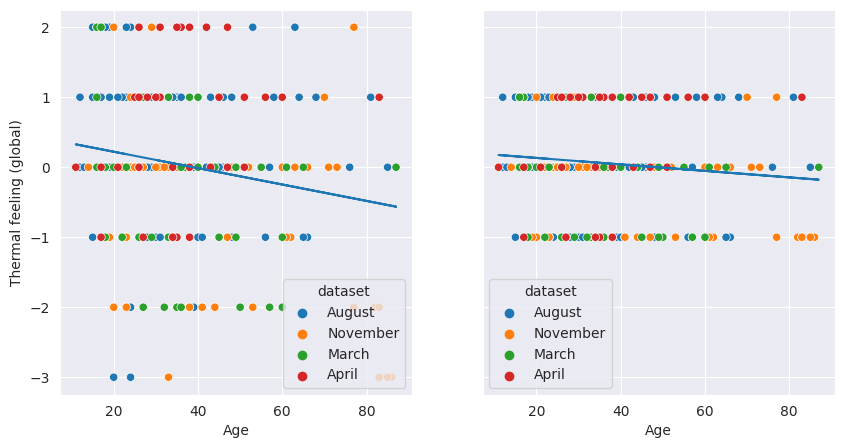

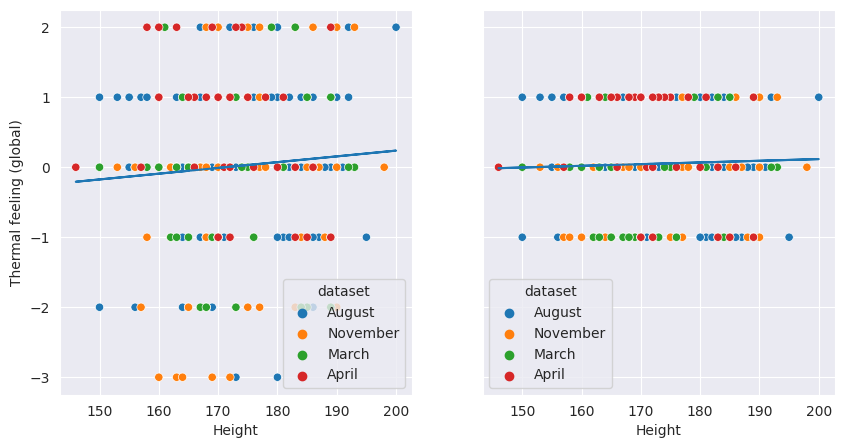

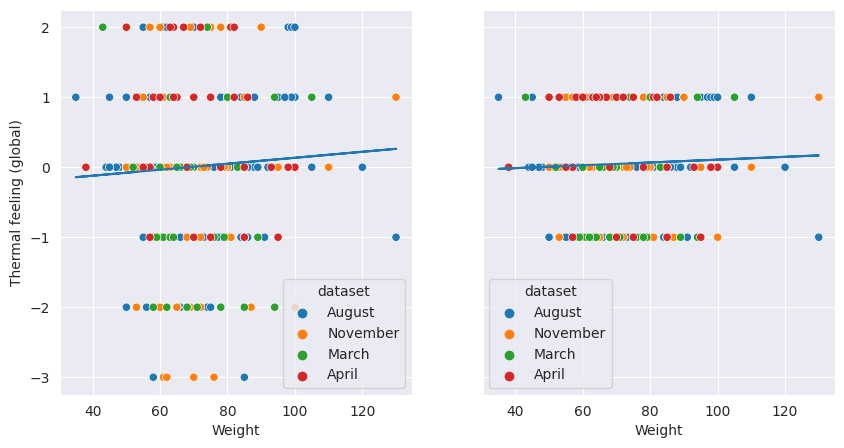

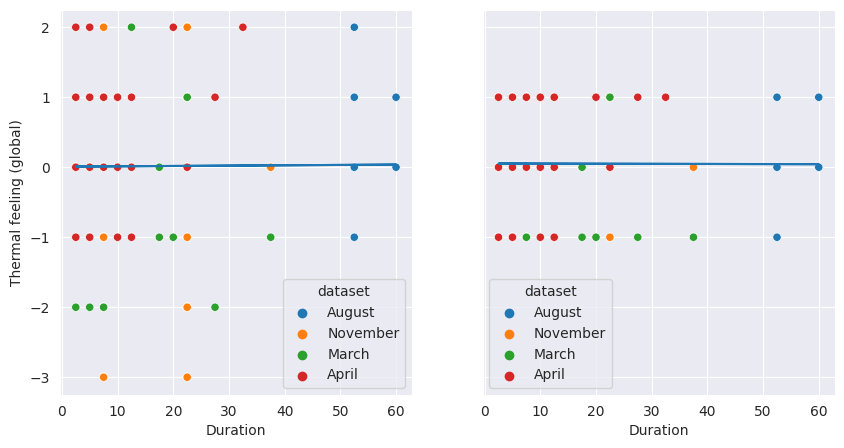

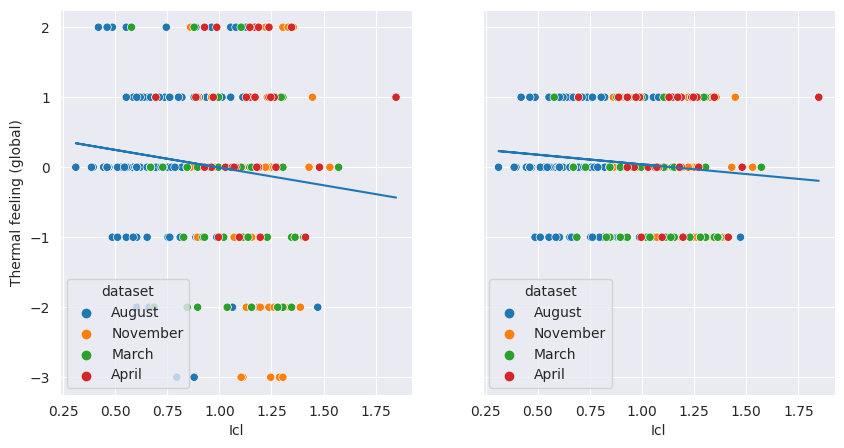

In [95]:
for col in ['Outside Temperature', 'Avg. Temperature', 'RH', 'va', 'Tg',
       'Gender', 'Age', 'Height', 'Weight', 'Duration', 'Icl']:

    fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))

    # Whole y range (-3, 3)
    m,c = np.polyfit(df[col], df['Thermal feeling (global)'], 1)
    y = m*df[col] + c

    sns.scatterplot(ax=axes[0],data=df, x=col, y='Thermal feeling (global)', hue='dataset')
    axes[0].plot(df[col], y)
    # Reduced range (-1, 1)
    m2,c2 = np.polyfit(df[col], df['comfort_group'], 1)
    y = m2*df[col] + c2

    sns.scatterplot(ax=axes[1],data=df, x=col, y='comfort_group', hue='dataset')
    axes[1].plot(df[col], y)
    plt.show()


Fazit: For predictive models, the y-range should not be reduced to (-1, 1). No feature shows clearly a linear relationship